# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                          })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | invercargill
Processing Record 2 of Set 1 | great falls
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | boguchany
Processing Record 8 of Set 1 | lander
Processing Record 9 of Set 1 | sarupathar
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | margaret river
Processing Record 13 of Set 1 | kulia village
City not found. Skipping...
Processing Record 14 of Set 1 | tazovsky
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | papatowai
Processing Record 17 of Set 1 | la gi
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | isle of lewis
City not found. Skipping...
Processing Record 20 of Set 1 | utri

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,invercargill,-46.4000,168.3500,15.57,69,43,7.15,NZ,1707347627
1,great falls,47.5002,-111.3008,-3.34,86,100,3.60,US,1707347627
2,yellowknife,62.4560,-114.3525,-15.33,90,100,3.58,CA,1707347319
3,waitangi,-43.9535,-176.5597,19.34,89,70,2.36,NZ,1707347280
4,edinburgh of the seven seas,-37.0676,-12.3116,17.39,66,64,1.83,SH,1707347628


In [6]:
#convert datetime into readable format
city_data_df['Data']=(pd.to_datetime(city_data_df['Date'], unit = 's')).dt.date
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Data
0,invercargill,-46.4000,168.3500,15.57,69,43,7.15,NZ,1707347627,2024-02-07
1,great falls,47.5002,-111.3008,-3.34,86,100,3.60,US,1707347627,2024-02-07
2,yellowknife,62.4560,-114.3525,-15.33,90,100,3.58,CA,1707347319,2024-02-07
3,waitangi,-43.9535,-176.5597,19.34,89,70,2.36,NZ,1707347280,2024-02-07
4,edinburgh of the seven seas,-37.0676,-12.3116,17.39,66,64,1.83,SH,1707347628,2024-02-07


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Data
City_ID,,,,,,,,,,
0,invercargill,-46.4000,168.3500,15.57,69,43,7.15,NZ,1707347627,2024-02-07
1,great falls,47.5002,-111.3008,-3.34,86,100,3.60,US,1707347627,2024-02-07
2,yellowknife,62.4560,-114.3525,-15.33,90,100,3.58,CA,1707347319,2024-02-07
3,waitangi,-43.9535,-176.5597,19.34,89,70,2.36,NZ,1707347280,2024-02-07
4,edinburgh of the seven seas,-37.0676,-12.3116,17.39,66,64,1.83,SH,1707347628,2024-02-07


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

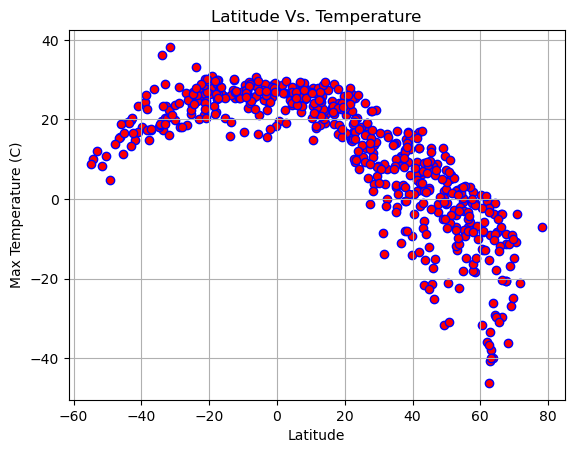

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', facecolors='r', edgecolors='b')

# Incorporate the other graph properties
plt.grid()
plt.title('Latitude Vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

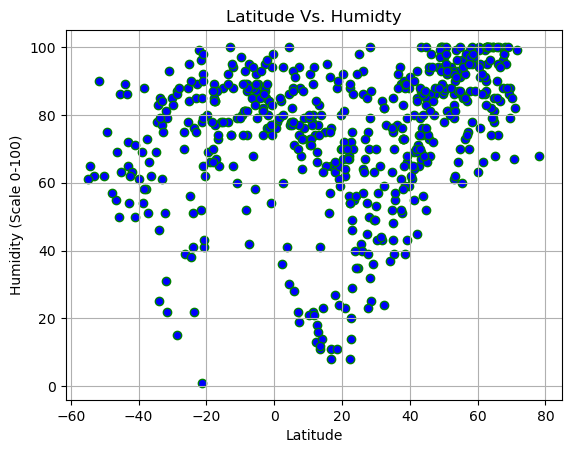

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o', facecolors='b', edgecolors='g')

# Incorporate the other graph properties
plt.grid()
plt.title(f'Latitude Vs. Humidty')
plt.xlabel('Latitude')
plt.ylabel('Humidity (Scale 0-100)')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

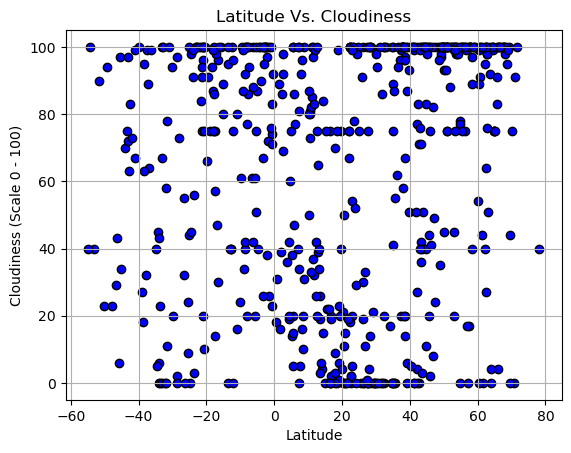

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.title('Latitude Vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (Scale 0 - 100)')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

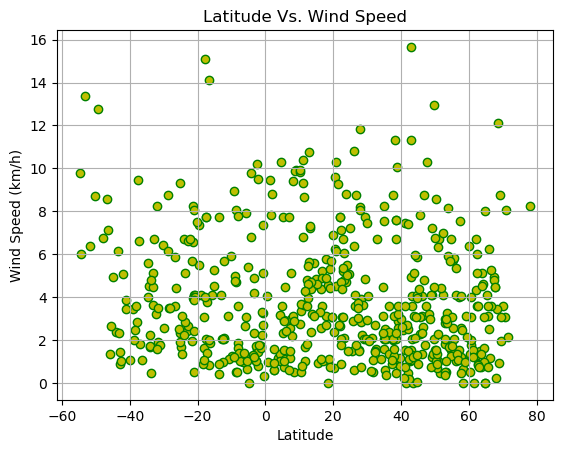

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o', facecolors='y', edgecolors='g')

# Incorporate the other graph properties
plt.grid()
plt.title('Latitude Vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (km/h)')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def lr_func(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,color='r')
    print(f'Linear equation: {line_eq}')
    print(f'R squared: {rvalue**2}')


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Data
City_ID,,,,,,,,,,
1,great falls,47.5002,-111.3008,-3.34,86,100,3.60,US,1707347627,2024-02-07
2,yellowknife,62.4560,-114.3525,-15.33,90,100,3.58,CA,1707347319,2024-02-07
5,boguchany,58.3814,97.4531,-18.32,100,97,0.64,RU,1707347628,2024-02-07
6,lander,42.8330,-108.7307,6.33,74,0,1.54,US,1707347629,2024-02-07
7,sarupathar,26.1984,93.8094,12.81,93,30,0.61,IN,1707347629,2024-02-07


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Data
City_ID,,,,,,,,,,
0,invercargill,-46.4000,168.3500,15.57,69,43,7.15,NZ,1707347627,2024-02-07
3,waitangi,-43.9535,-176.5597,19.34,89,70,2.36,NZ,1707347280,2024-02-07
4,edinburgh of the seven seas,-37.0676,-12.3116,17.39,66,64,1.83,SH,1707347628,2024-02-07
8,adamstown,-25.0660,-130.1015,24.70,84,100,9.34,PN,1707347337,2024-02-07
9,grytviken,-54.2811,-36.5092,10.15,65,100,6.00,GS,1707347630,2024-02-07


###  Temperature vs. Latitude Linear Regression Plot

Linear equation: y = -0.71x + 32.54
R squared: 0.720264097855604


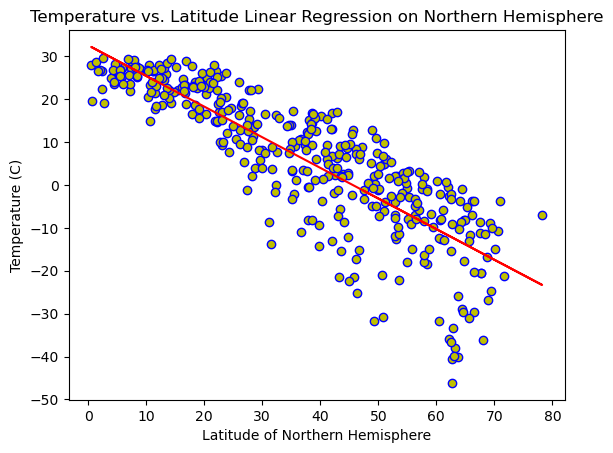

In [16]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], marker='o', facecolors='y', edgecolors='b')
plt.title("Temperature vs. Latitude Linear Regression on Northern Hemisphere")
plt.xlabel("Latitude of Northern Hemisphere")
plt.ylabel("Temperature (C)")

x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']

lr_func(x,y)
plt.show()

Linear equation: y = 0.23x + 28.46
R squared: 0.36997053033943544


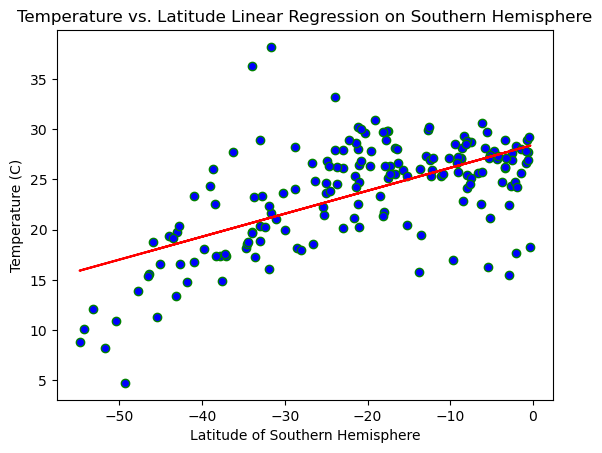

In [17]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='g')
plt.title("Temperature vs. Latitude Linear Regression on Southern Hemisphere")
plt.xlabel("Latitude of Southern Hemisphere")
plt.ylabel("Temperature (C)")

x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']

lr_func(x,y)
plt.show()

**Discussion about the linear relationship:**<br><br>
We can see that there is a relationship between latitude and temperature, with a postive correllation in the Southern Hemisphere and a negative correllation in the Northern Hemisphere.qaaqqqqwerpkfggnmp<br><br>
When looking at the r squared values, we see that the northern hemisphere data fits the line better as the values seem much more bunched together. I'd be curious to dig deeper to figure out why this might be the case.

### Humidity vs. Latitude Linear Regression Plot

Linear equation: y = 0.51x + 54.98
R squared: 0.2112500234839385


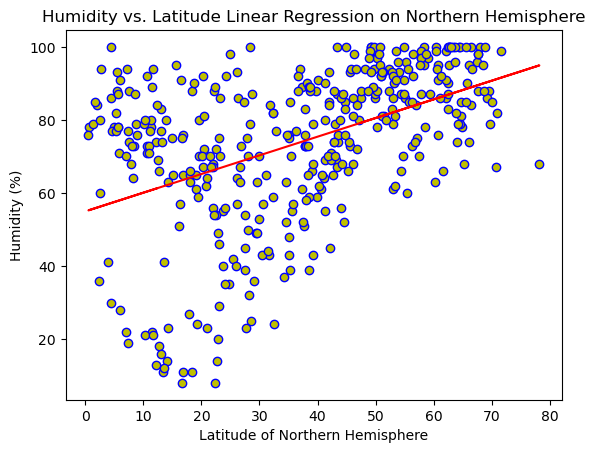

In [18]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], marker='o', facecolors='y', edgecolors='b')
plt.title("Humidity vs. Latitude Linear Regression on Northern Hemisphere")
plt.xlabel("Latitude of Northern Hemisphere")
plt.ylabel("Humidity (%)")

x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']

lr_func(x,y)
plt.show()

Linear equation: y = 0.44x + 83.71
R squared: 0.130000169059537


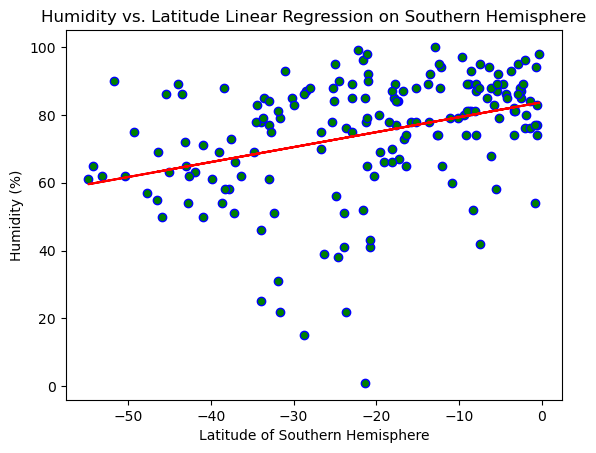

In [19]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], marker='o', facecolors='g', edgecolors='b')
plt.title("Humidity vs. Latitude Linear Regression on Southern Hemisphere")
plt.xlabel("Latitude of Southern Hemisphere")
plt.ylabel("Humidity (%)")

x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']

lr_func(x,y)
plt.show()

**Discussion about the linear relationship:**<br><br>

Though there appears to be a loose possitive relationship between latitude and humidity, but the spread out nature of the graph and the low R squared values tell us that this is not a strong relationship.

### Cloudiness vs. Latitude Linear Regression Plot

Linear equation: y = 0.7x + 36.65
R squared: 0.11826100603732603


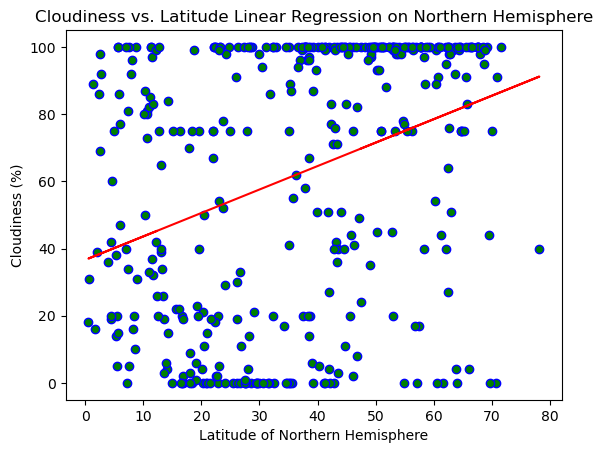

In [20]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], marker='o', facecolors='g', edgecolors='b')
plt.title("Cloudiness vs. Latitude Linear Regression on Northern Hemisphere")
plt.xlabel("Latitude of Northern Hemisphere")
plt.ylabel("Cloudiness (%)")

x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']

lr_func(x,y)
plt.show()

Linear equation: y = 0.54x + 77.76
R squared: 0.0520634496328971


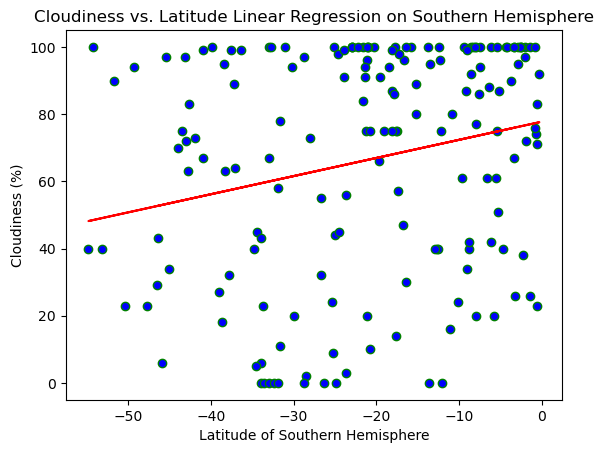

In [21]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='g')
plt.title("Cloudiness vs. Latitude Linear Regression on Southern Hemisphere")
plt.xlabel("Latitude of Southern Hemisphere")
plt.ylabel("Cloudiness (%)")

x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']

lr_func(x,y)
plt.show()

**Discussion about the linear relationship:**<br><br>

The spread out data points and very low R squared values tell me right away that there isn't a connection between Cloudiness and Latitude.

### Wind Speed vs. Latitude Linear Regression Plot

Linear equation: y = -0.02x + 4.36
R squared: 0.01890026526824788


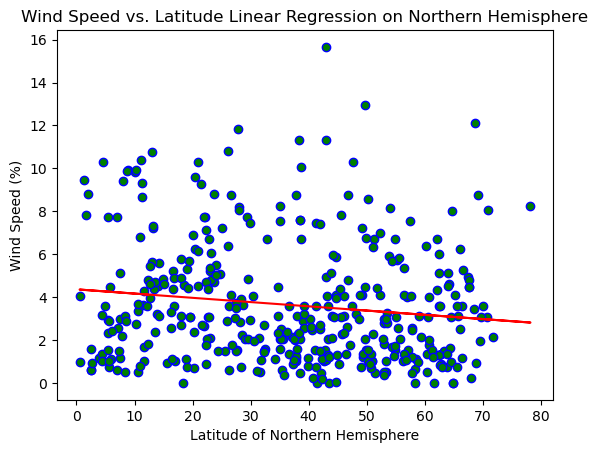

In [22]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], marker='o', facecolors='g', edgecolors='b')
plt.title("Wind Speed vs. Latitude Linear Regression on Northern Hemisphere")
plt.xlabel("Latitude of Northern Hemisphere")
plt.ylabel("Wind Speed (%)")

x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']

lr_func(x,y)
plt.show()

Linear equation: y = -0.05x + 2.96
R squared: 0.0519898826738788


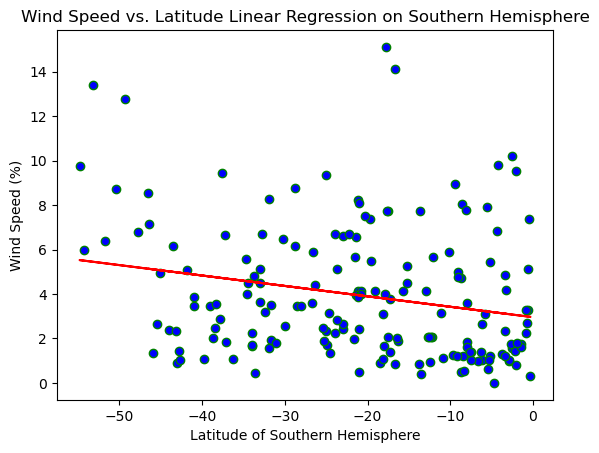

In [23]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='g')
plt.title("Wind Speed vs. Latitude Linear Regression on Southern Hemisphere")
plt.xlabel("Latitude of Southern Hemisphere")
plt.ylabel("Wind Speed (%)")

x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']

lr_func(x,y)
plt.show()

**Discussion about the linear relationship:**<br><br>

The data points are far too spread out causing very low R squared values, so I would say there is not relationship between Wind Speed and Latitude 